## 人工神经网络算法
&emsp;&emsp;人工神经网络（Artificial Neural Network，ANN）简称神经网络，是机器学习和认知科学领域中一种模仿生物神经网络结果和功能的数学模型或计算模型，用于对函数进行估计或近似。
&emsp;&emsp;全连接神经网络（Multi-Layer Perception，MLP）或者叫多层感知机，是一种连接方式较为简单的人工神经网络结果，属于前馈神经网络的一种，主要由输入层、隐藏层和输出层狗曾。影响MLP性能的因素主要是激活函数与网络结构。  
（1）激活函数
&emsp;&emsp;常用的激活函数有：sigmoid函数、tanh函数与ReLU函数。  
sigmoid：$f(x)=\frac{1}{1+e^{-x}}$  
tanh：$f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$  
ReLu：$f(x)=max(0,x)$  
Leaky ReLu：$f(x)=\begin{cases}
x  & \text{ if } x \ge 0 \\
\alpha x  & \text{ if } x < 0
\end{cases}$  
ELU：$f(x)=\begin{cases}
x  & \text{ if } x \ge 0 \\
\alpha  & \text{ if } x < 0
\end{cases}$  
softplus：$f(x)= ln(1+e^{x})$  
Softmax：$\frac{e^{x}}{\sum e^{x}} $  
Swish：$x \cdot Sigmoid(x)$

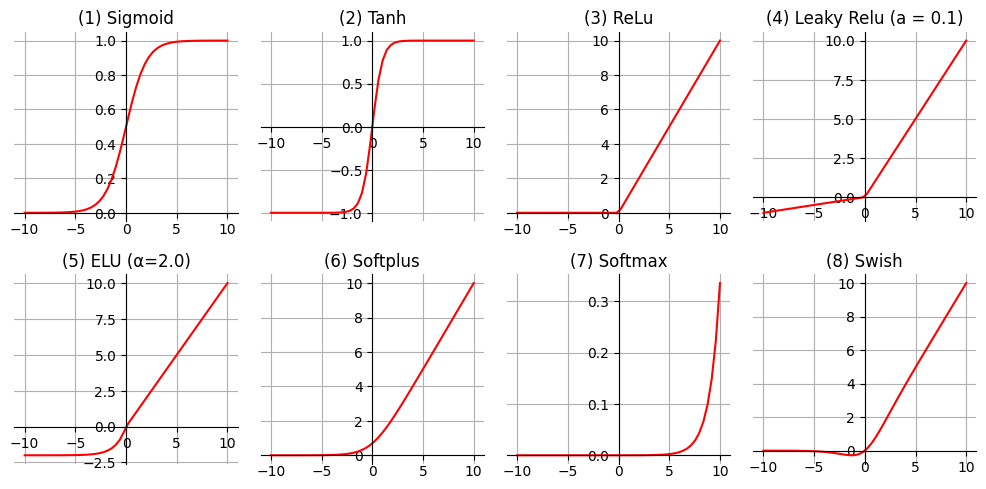

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)

##### 绘制sigmoid图像
fig = plt.figure(figsize=(10,5))
y_sigmoid = 1/(1+np.exp(-x))
ax = fig.add_subplot(241)
ax.plot(x,y_sigmoid,color='red')
ax.grid()
ax.set_title('(1) Sigmoid')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

##### 绘制Tanh图像
ax = fig.add_subplot(242)
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
ax.plot(x,y_tanh,color='red')
ax.grid()
ax.set_title('(2) Tanh')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

##### 绘制Relu图像
ax = fig.add_subplot(243)
y_relu = np.array([0*item  if item<0 else item for item in x ])
ax.plot(x,y_relu,color='red')
ax.grid()
ax.set_title('(3) ReLu')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

##### 绘制Leaky Relu图像
ax = fig.add_subplot(244)
y_relu = np.array([0.1*item  if item<0 else item for item in x ])
ax.plot(x,y_relu,color='red')
ax.grid()
ax.set_title('(4) Leaky Relu (a = 0.1)')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

##### 绘制ELU图像
ax = fig.add_subplot(245)
y_elu = np.array([2.0*(np.exp(item)-1)  if item<0 else item for item in x ])
ax.plot(x,y_elu,color='red')
ax.grid()
ax.set_title('(5) ELU (α=2.0)')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

##### 绘制Softplus图像
ax = fig.add_subplot(246)
y_softplus = np.array([np.math.log(1+np.exp(item), np.e) for item in x ])
ax.plot(x,y_softplus,color='red')
ax.grid()
ax.set_title('(6) Softplus')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

##### 绘制Softmax图像
ax = fig.add_subplot(247)
z = np.linspace(-10,10)   #可以单独调节softmax的输入取值
zero = 0
sumz = np.sum(np.array([np.exp(item) for item in z]))
y_softmax = np.array([np.exp(item)/sumz for item in z ])
ax.plot(z,y_softmax,color='red')
ax.grid()
ax.set_title('(7) Softmax')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

##### 绘制Smish图像
ax = fig.add_subplot(248)
y_softplus = x * y_sigmoid
ax.plot(x,y_softplus,color='red')
ax.grid()
ax.set_title('(8) Swish')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.tight_layout()
plt.savefig('Activation.png')
plt.show()


In [2]:
## 进行可视化时需要的一些设置
%config InlineBackend.figure_format = "retina"
%matplotlib inline    
import seaborn as sns 
sns.set_theme(font= "KaiTi",style="whitegrid",font_scale=1.4)
import matplotlib
matplotlib.rcParams["axes.unicode_minus"]=False # 解决坐标轴的负号显示问题

## 导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import *
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import *
import missingno as msno

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier

import graphviz
from dtreeviz import trees
from IPython.display import Image  
import pydotplus
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

In [4]:
## 手写数字数据导入与降维
MNIST_train = pd.read_csv("data/chap07/mnist_train.csv")
MNIST_test = pd.read_csv("data/chap07/mnist_test.csv")

# 在此填写代码，将训练集数据和测试集数据的 x 缩放到0~1之间





print("MNIST_train_x.shape",MNIST_train_x.shape)
print("MNIST_train_y.shape",MNIST_train_y.shape)
print("MNIST_test_x.shape",MNIST_test.shape)
print("MNIST_test_y.shape",MNIST_test_y.shape)

MNIST_train_x.shape (60000, 784)
MNIST_train_y.shape (60000,)
MNIST_test_x.shape (10000, 785)
MNIST_test_y.shape (10000,)


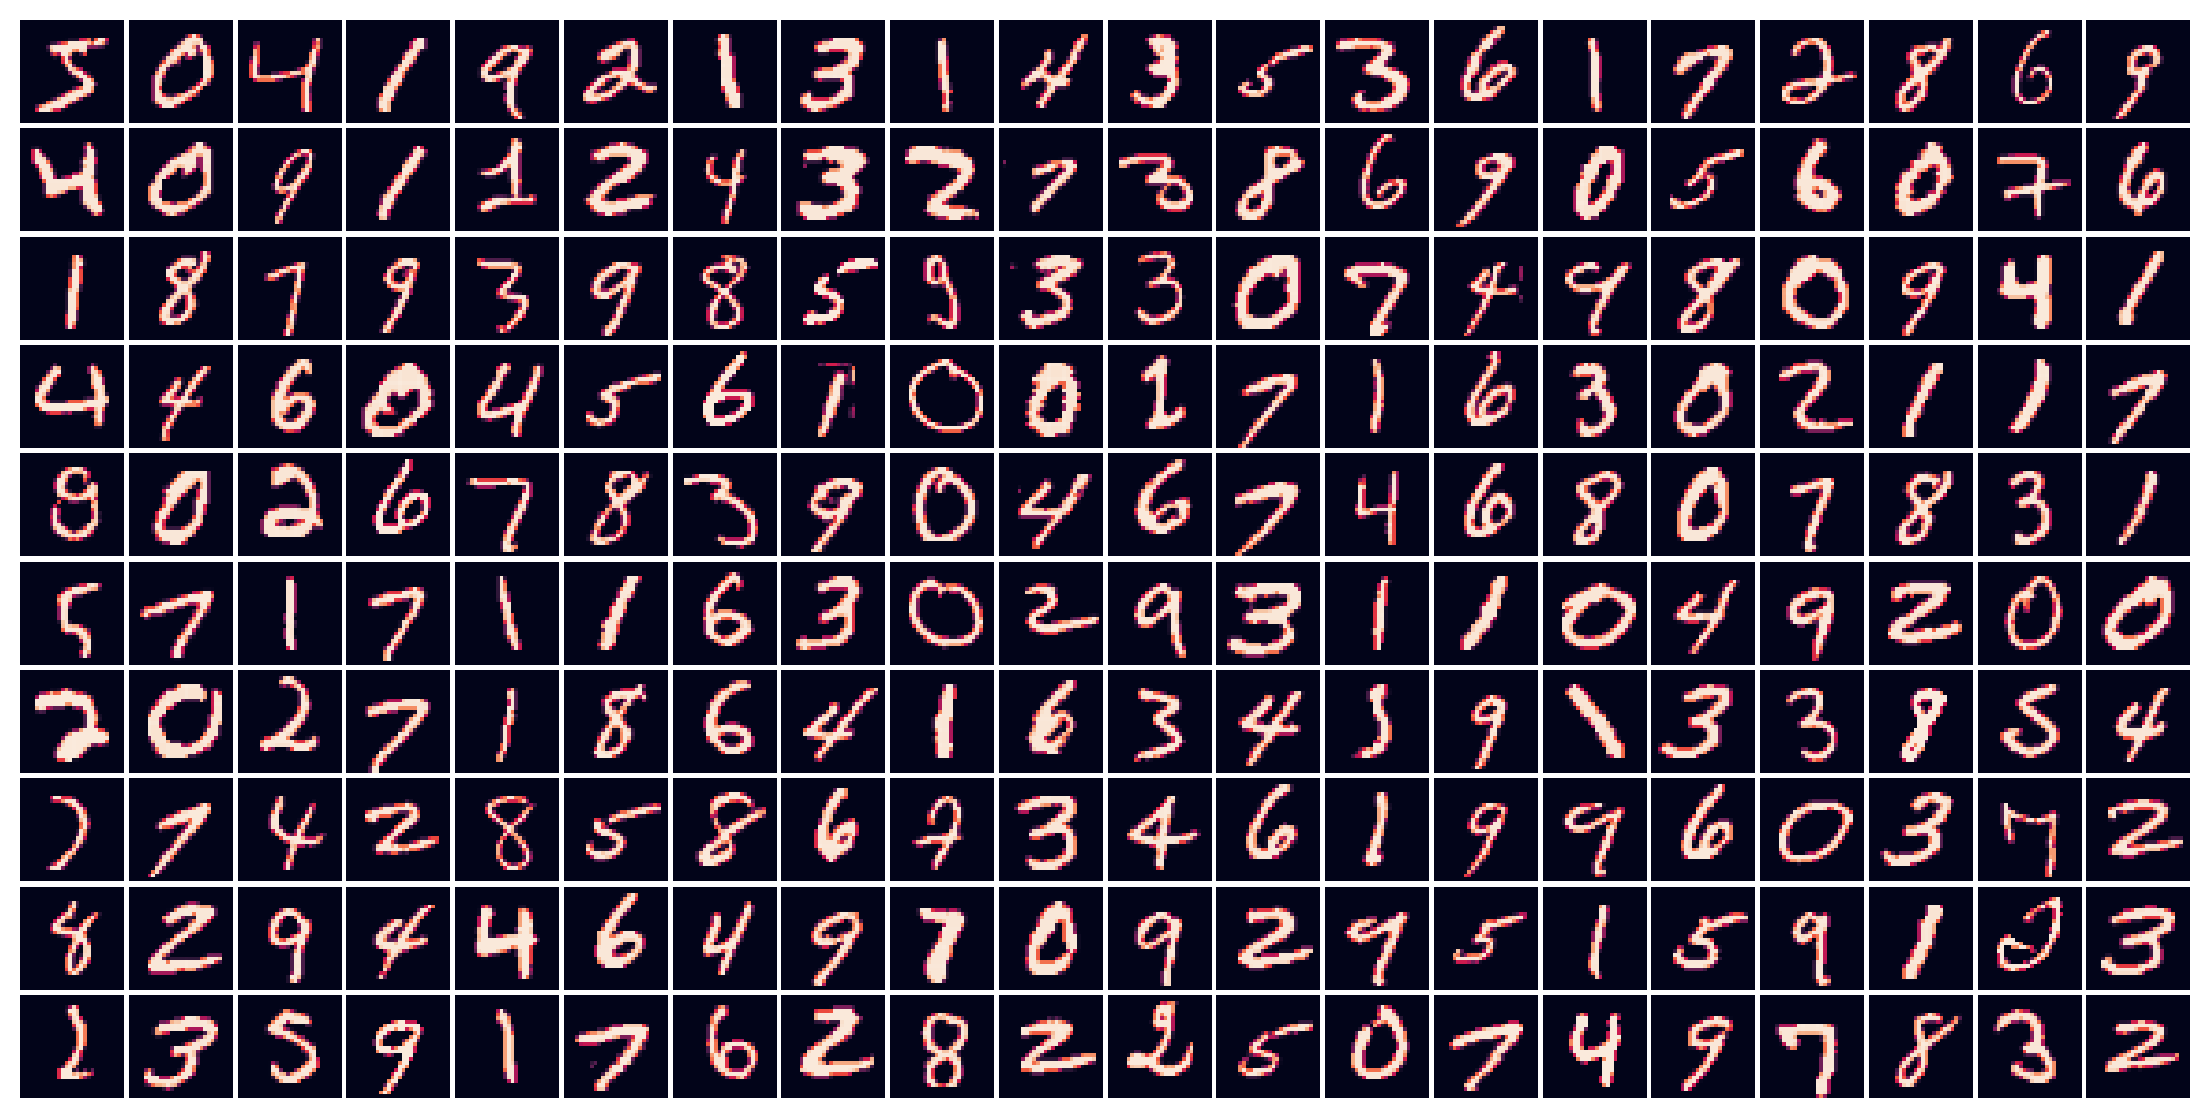

In [5]:
## 可视化数据中的几个样本
plt.figure(figsize=(14,7))     
for ii in range(200):
    plt.subplot(10,20,ii+1) 
    plt.imshow(MNIST_train_x.values[ii,:].reshape(28,-1))
    plt.axis("off")
    plt.grid()
plt.subplots_adjust(hspace=0.05,wspace = 0.05)
plt.show()

In [6]:
## 利用主成分分析进行数据降维
pca = PCA(n_components = 50,  # 获取的主成分数量
          random_state = 123) # 设置随机数种子，保证结果的可重复性
## 对数据进行降维
MNIST_train_pca = pca.fit_transform(MNIST_train_x)
MNIST_test_pca = pca.transform(MNIST_test_x)
print("MNIST_train_pca.shape",MNIST_train_pca.shape)
print("MNIST_test_pca.shape",MNIST_test_pca.shape)

MNIST_train_pca.shape (60000, 50)
MNIST_test_pca.shape (10000, 50)


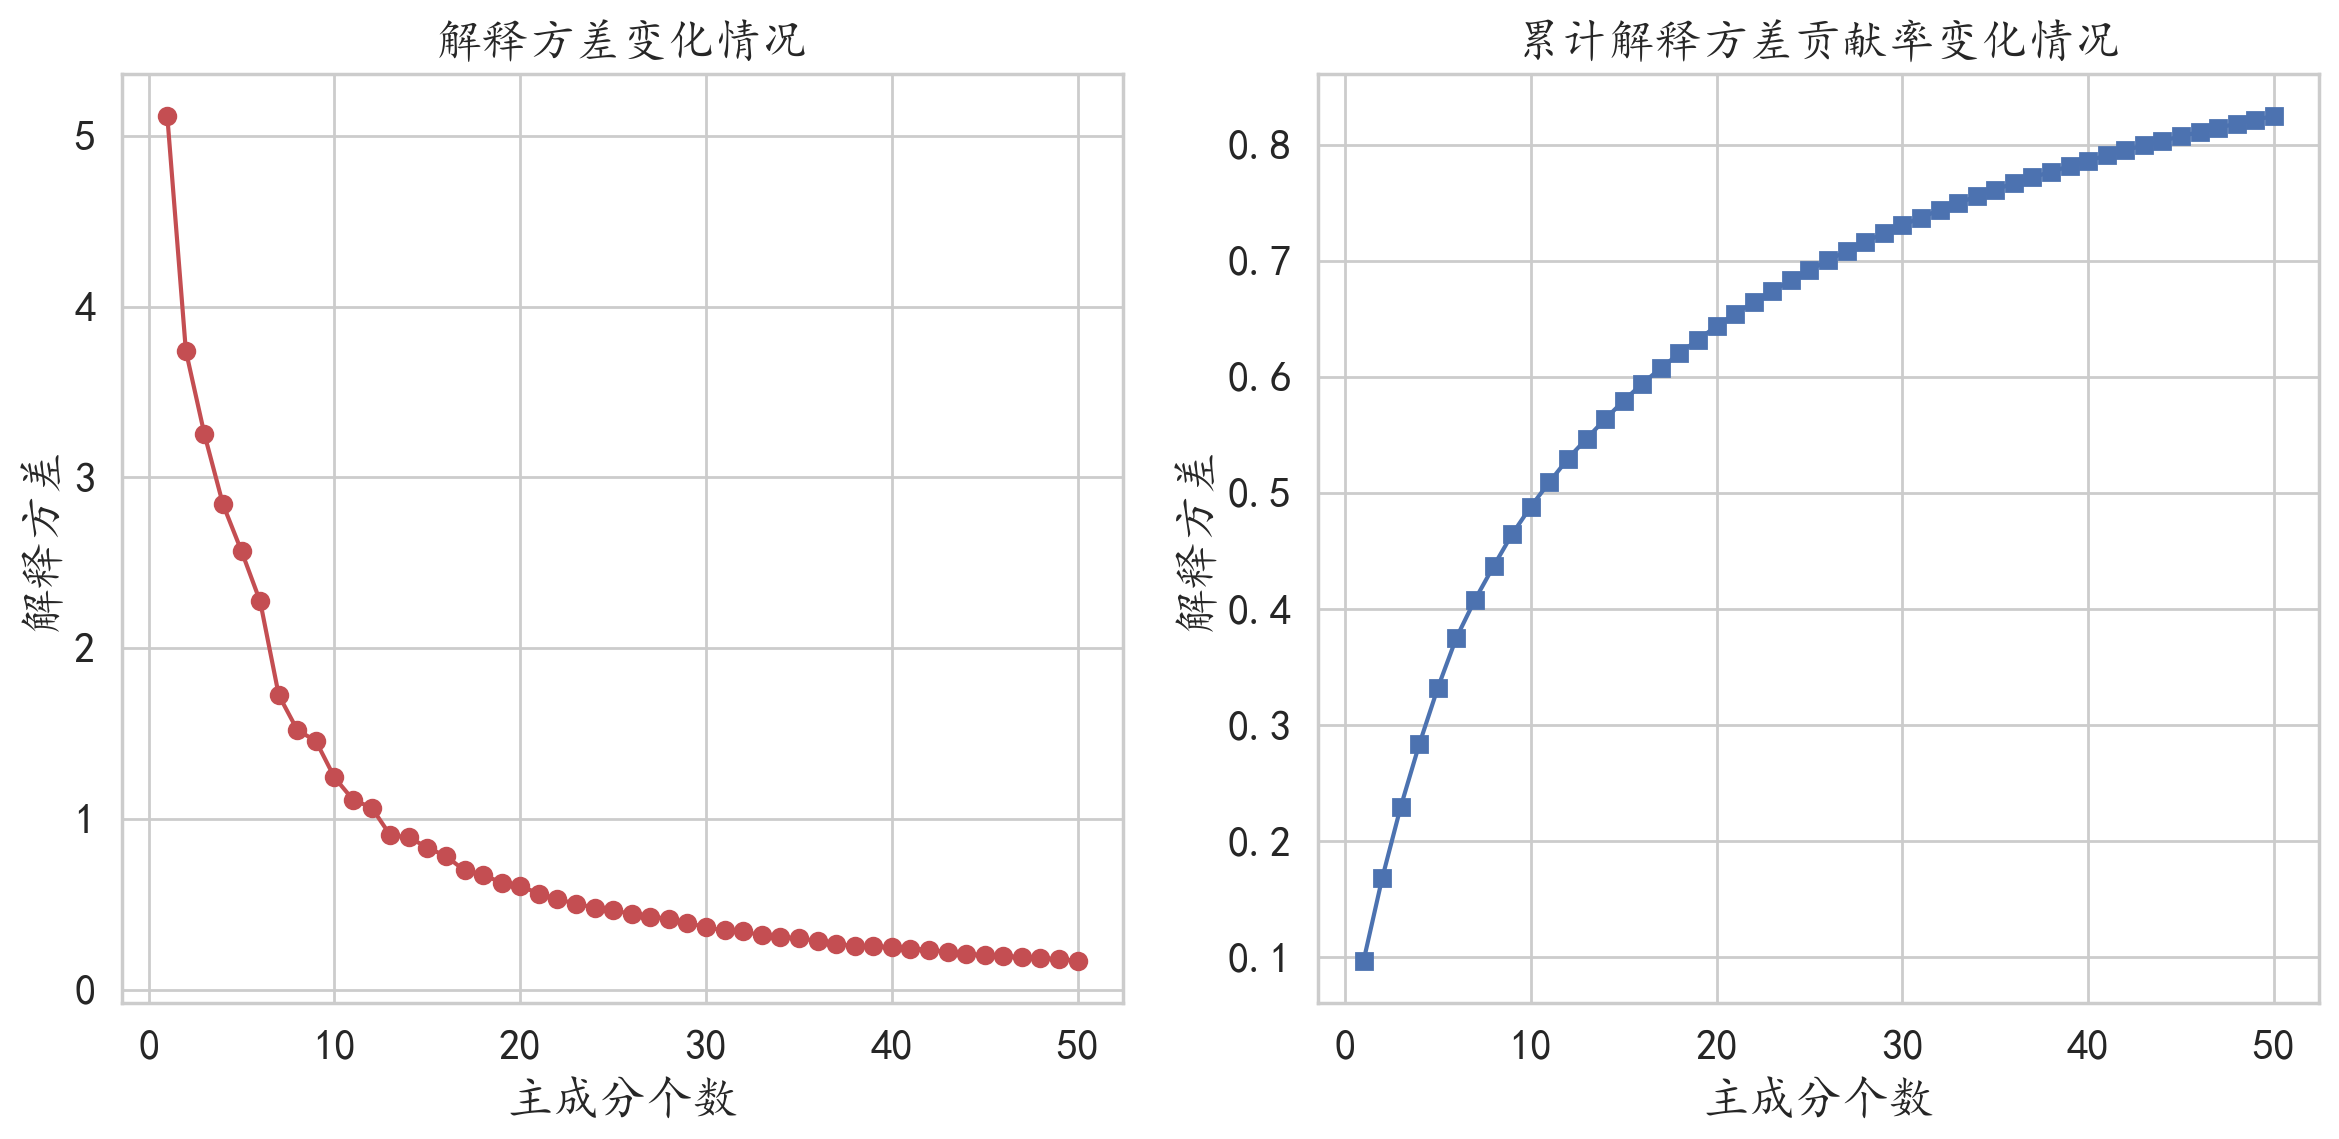

In [7]:
## 可视化分析每个主成分的解释方差和解释方差所占百分比
x = np.arange(MNIST_train_pca.shape[1])+1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,pca.explained_variance_,"r-o")
plt.xlabel("主成分个数")
plt.ylabel("解释方差")
plt.title("解释方差变化情况")
plt.subplot(1,2,2)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_),"b-s")
plt.xlabel("主成分个数")
plt.ylabel("解释方差")
plt.title("累计解释方差贡献率变化情况")
plt.tight_layout()
plt.show()

## 使用前50个主成分就获得了原始数据中超过百分子80的数据信息

In [8]:
# 在这填写代码，定义单隐藏层神经网络模型的参数
MLP = MLPClassifier(  , ## 隐藏层有50个神经元
                      , ## 隐藏层激活函数为“relu”
                      , ## 正则化L2惩罚的参数为“0.01”
                      , ## 求解方法为“adam”
                      , ## 学习权重更新的速率为“adaptive”
                      , ## 随机数为“10”
                        ## 不要将进度消息打印到标准输出)

## 在这填写代码，训练模型


## 在这填写代码，计算在训练集和测试集上的预测精度

                    

## 使用单层的全连接神经网络就获得了较高的数据分类精度

训练集预测精度: 0.9944833333333334
测试集预测精度: 0.9735


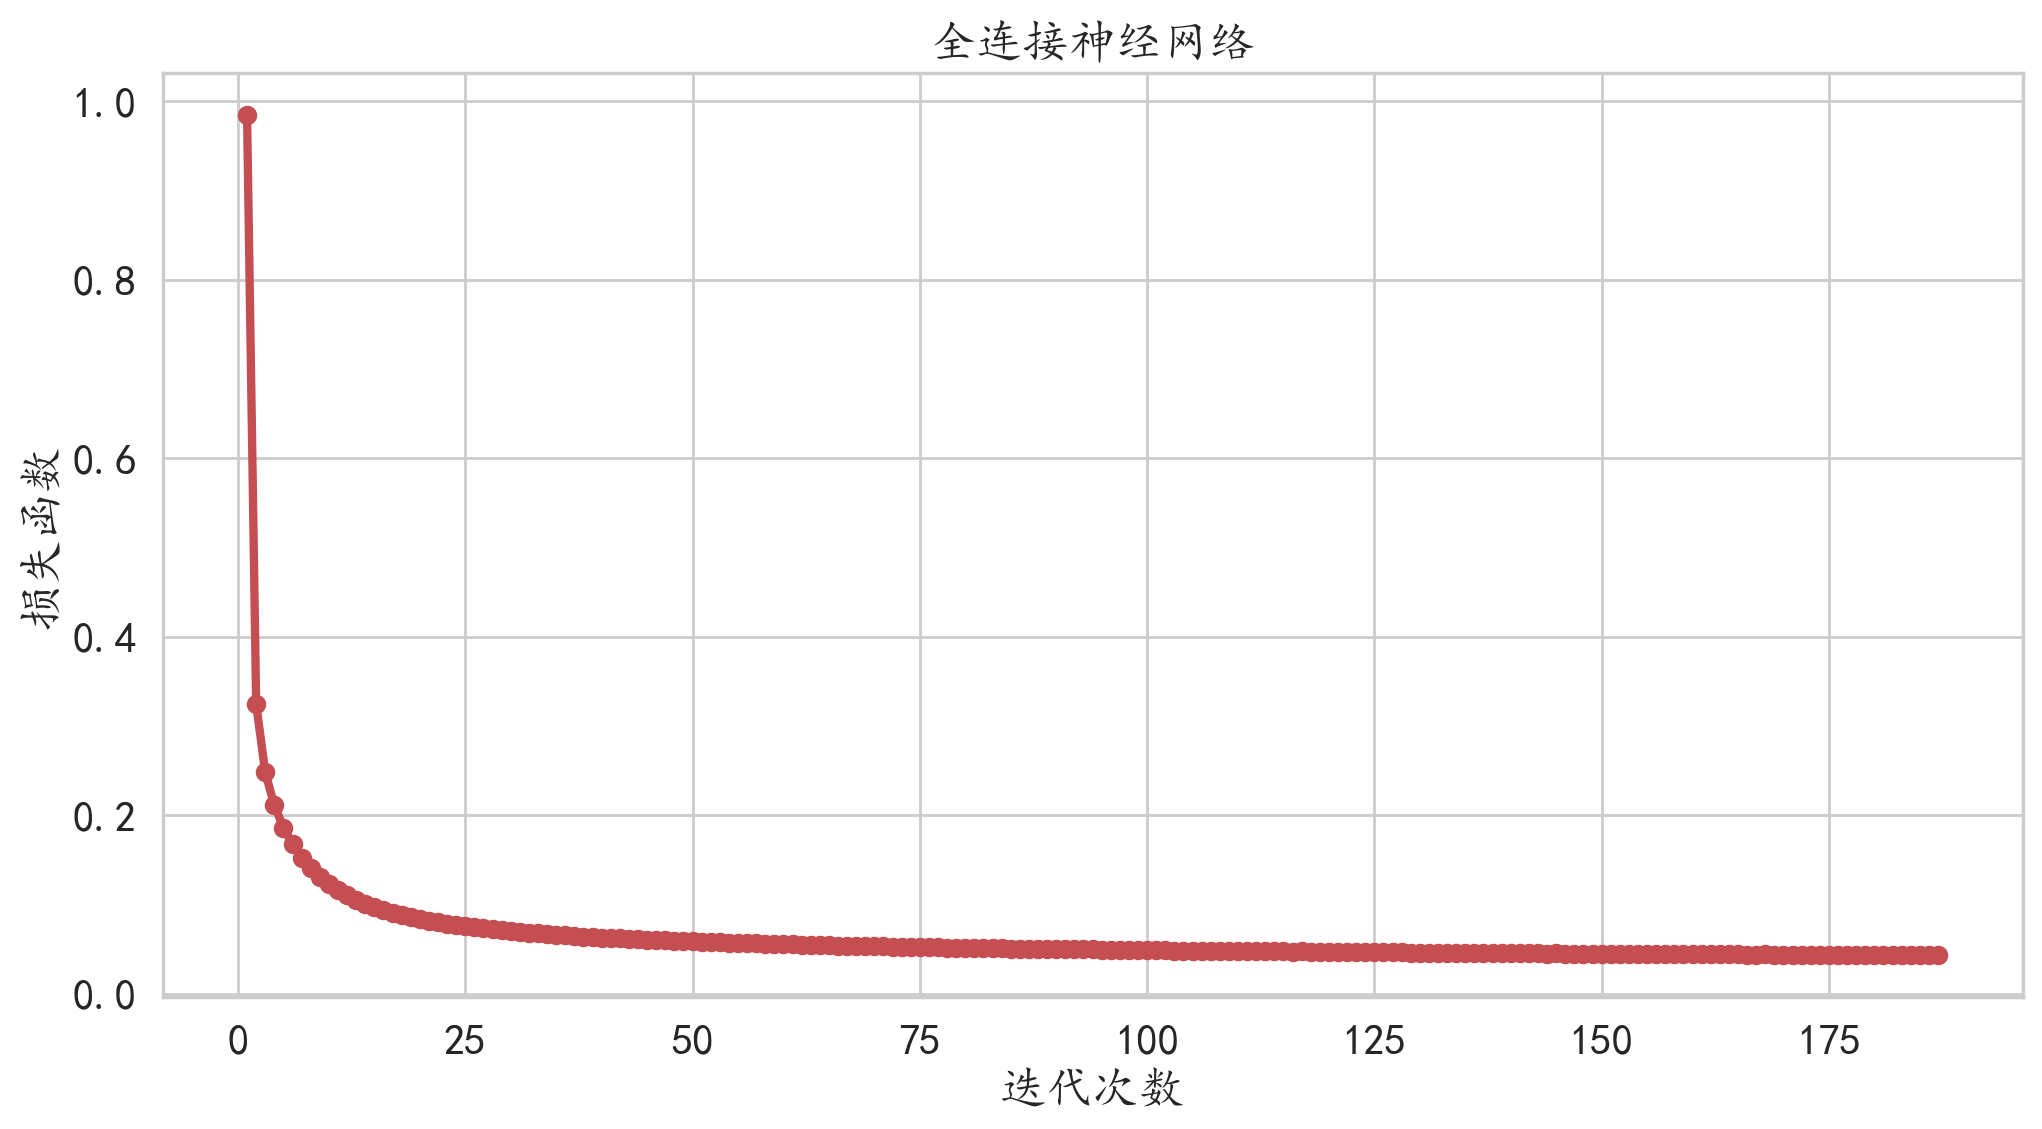

In [9]:
## 可视化迭代次数和损失之间的关系
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,MLP.n_iter_+1),MLP.loss_curve_,"r-o",lw = 3)
plt.xlabel("迭代次数")
plt.ylabel("损失函数")
plt.title("全连接神经网络")
plt.show()

## 可以发现只需要经过大约100多次迭代，单隐藏层的神经网络就已经收敛

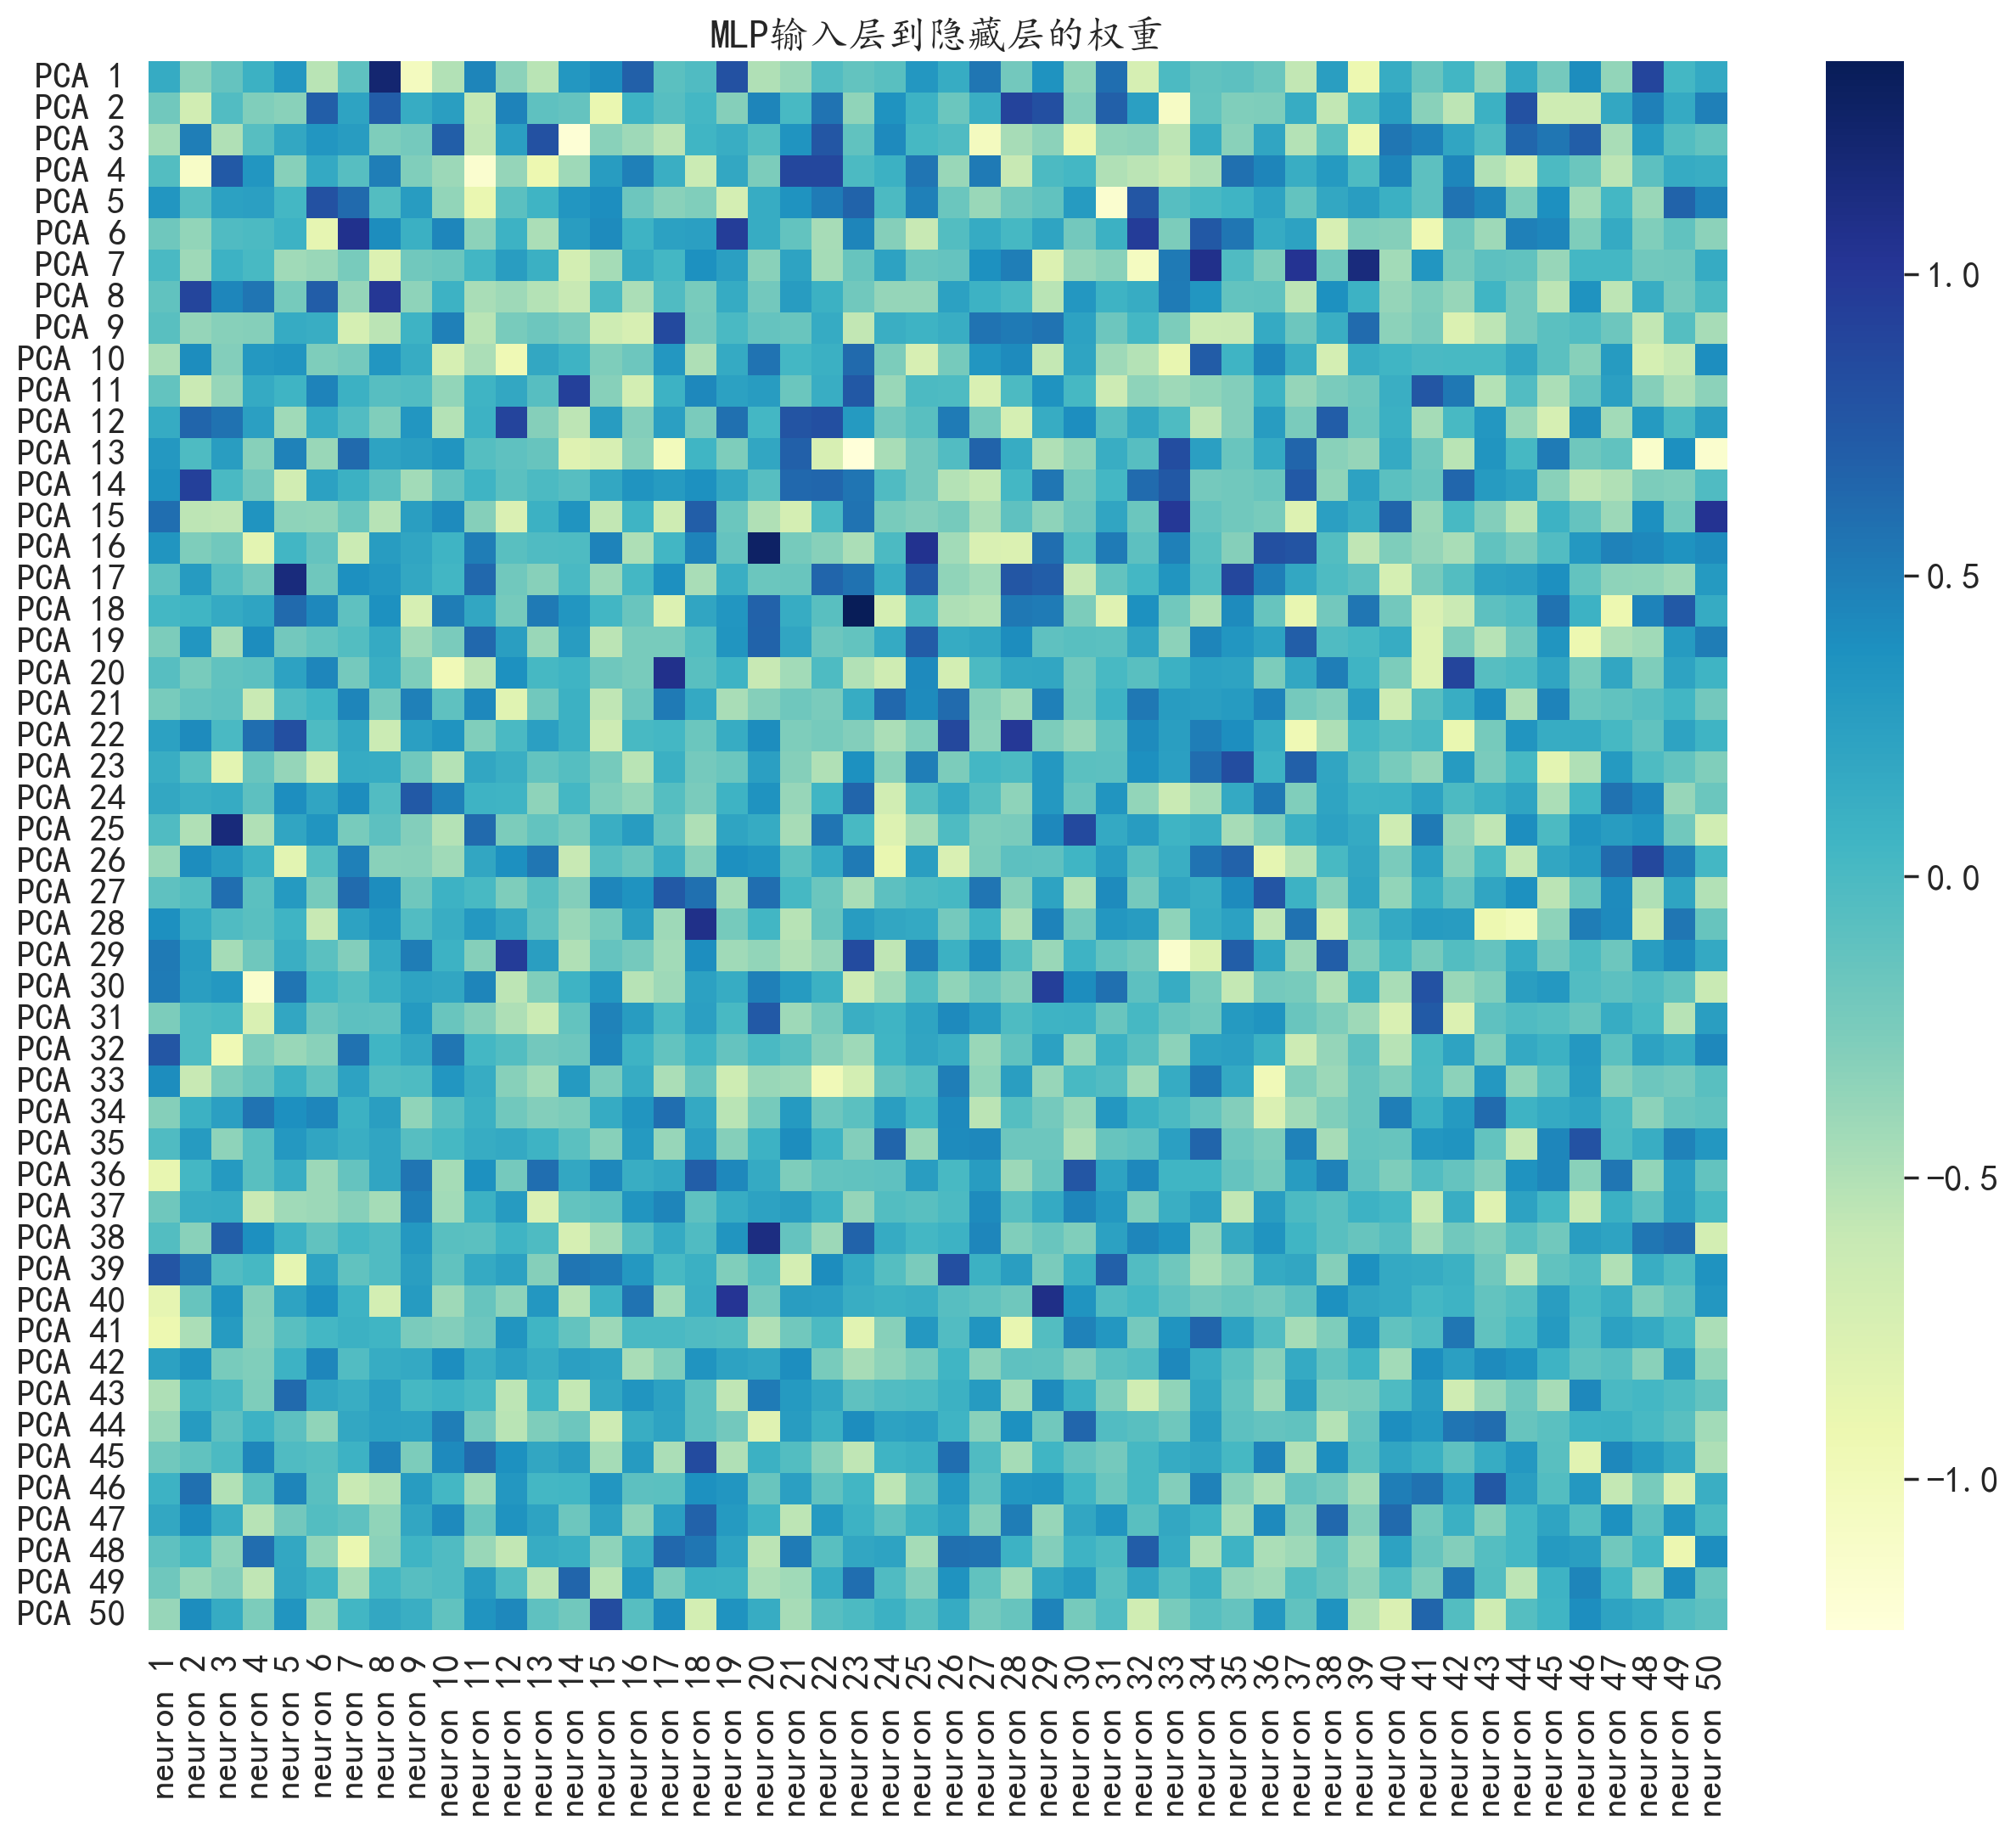

In [10]:
## 可视化输入层到隐藏层的权重
mat = MLP.coefs_[0]
## 绘制图像
plt.figure(figsize = (15,12))
sns.heatmap(mat ,annot=False,cmap="YlGnBu")
## 设置X轴标签
xticks = ["neuron "+str(i+1) for i in range(mat.shape[1])]
plt.xticks(np.arange(mat.shape[1])+0.5,xticks,rotation=90)
## 设置Y轴标签
yticks = ["PCA "+str(i+1) for i in range(mat.shape[0])]
plt.yticks(np.arange(mat.shape[0])+0.5,yticks,rotation=0)
plt.title("MLP输入层到隐藏层的权重")
plt.show()

In [11]:
## 分析隐藏层中神经元的数量对数据预测精度的影响
train_acc = []
test_acc = []
numbers = [5,10,20,30,40,50,70,100,150]
for n in numbers:
    # 在此填写代码，根据numbers提供的数字，即隐藏层神经元的数量，重新训练模型。
    MLP = MLPClassifier()
    

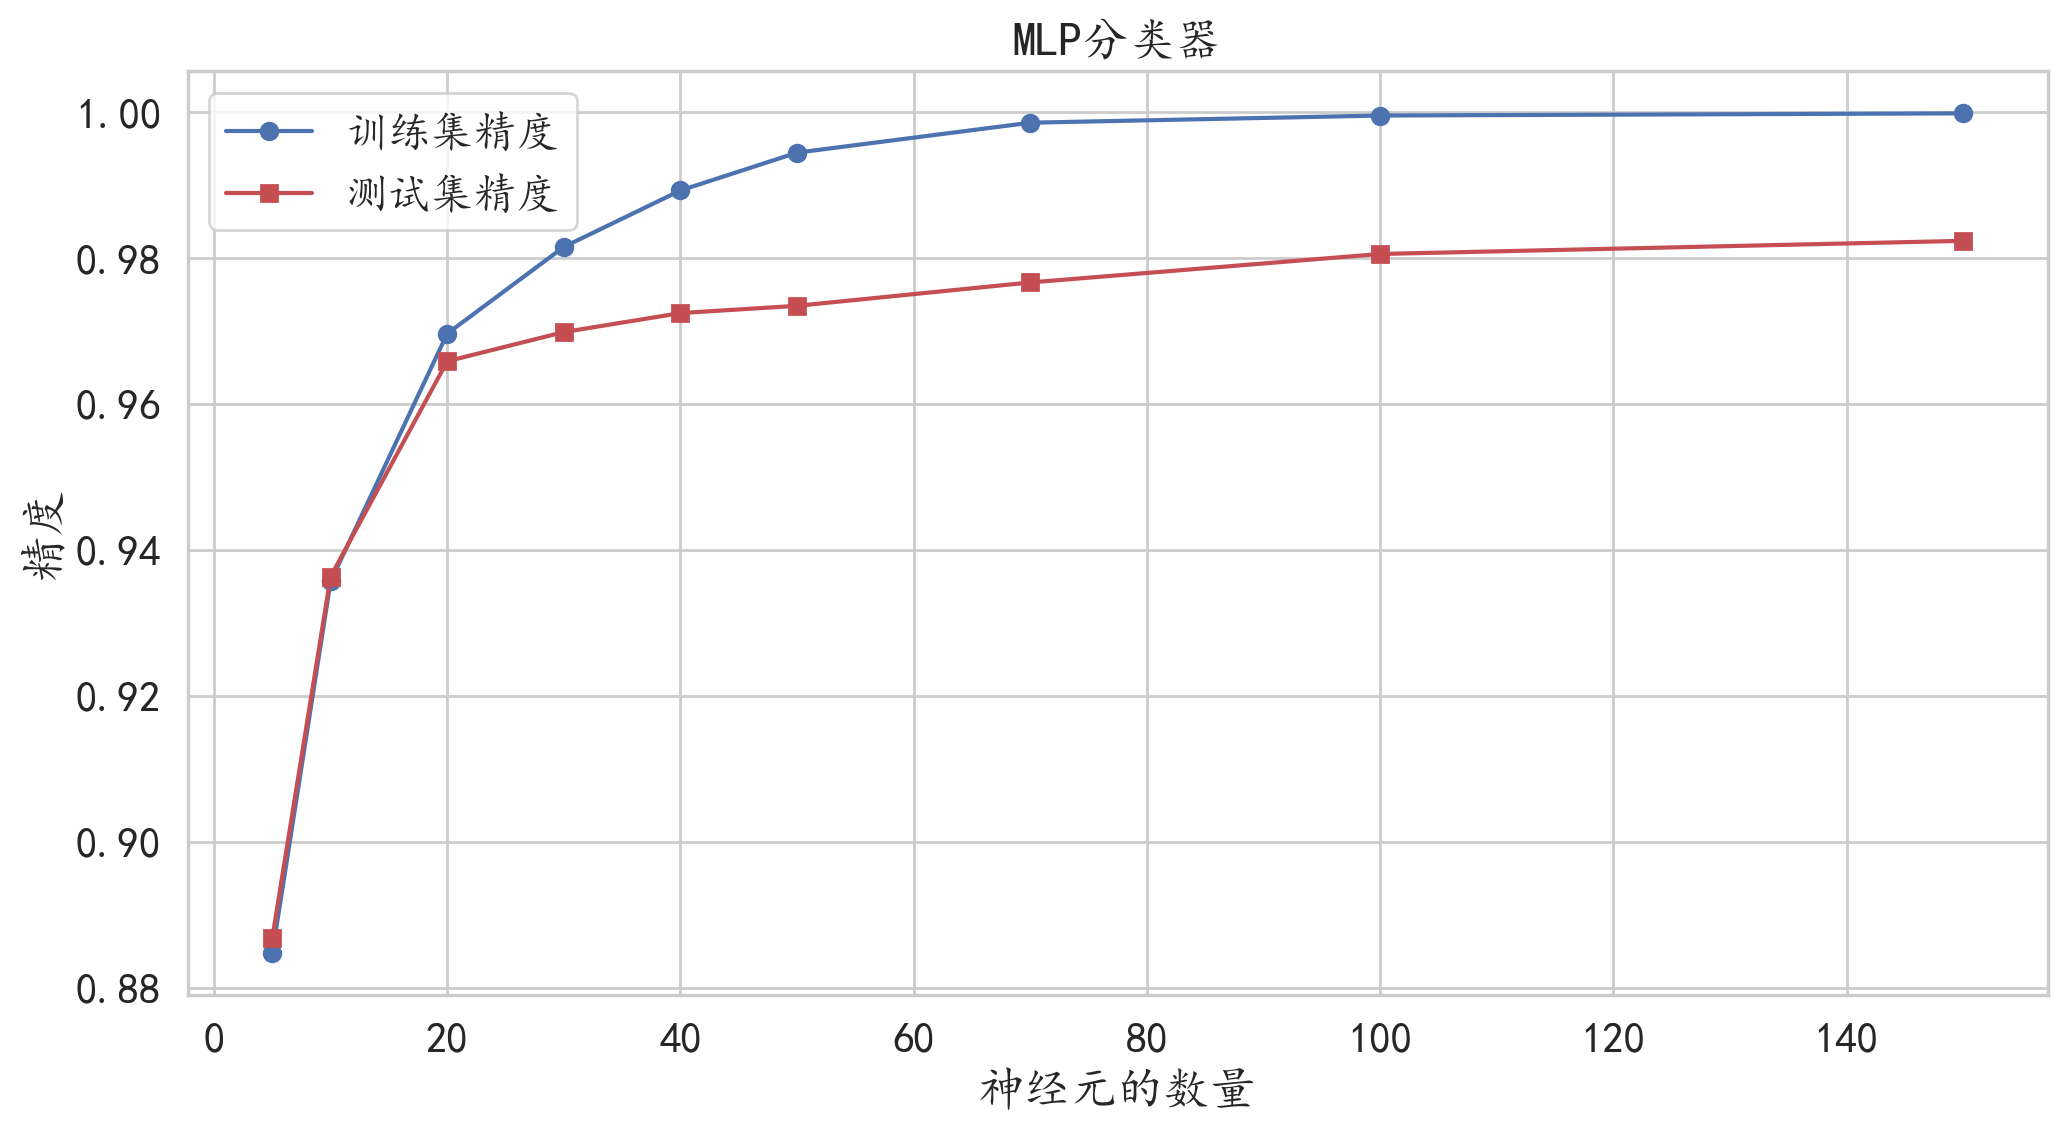

In [12]:
## 可视化
plt.figure(figsize=(12,6))
plt.plot(numbers,train_acc,"b-o",label = "训练集精度")
plt.plot(numbers,test_acc,"r-s",label = "测试集精度")
plt.xlabel("神经元的数量")
plt.ylabel("精度")
plt.title("MLP分类器")
plt.legend()
plt.show()

## 可以发现当神经元的数量增加时，在训练集和测试集上的精度在迅速的增减，在神经元数量超过100时，预测精度的增减很缓慢

In [13]:
## 尝试增加隐藏层的数量，查看是否会继续提高预测精度

## 在此填写代码，建立3个隐藏层，每个隐藏层包含100个神经元，定义多隐藏层神经网络模型的参数，重新训练模型
MLP = MLPClassifier()


## 可以发现由于使用单隐藏层就获得了较好的数据分类精度，从而提升隐藏层的数量并不能再继续的提升预测的精度
## 而且测试集的预测精度，反而会有稍微的下降

训练集预测精度: 0.9970166666666667
测试集预测精度: 0.9799
